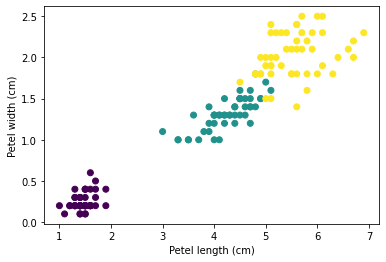

In [1]:
#Supervised leraning classifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
iris.feature_names
Data_iris = iris.data
Data_iris = pd.DataFrame(Data_iris, columns= iris.feature_names)
Data_iris['label'] = iris.target

plt.scatter(Data_iris.iloc[:,2], Data_iris.iloc[:,3], c = iris.target)
plt.xlabel('Petel length (cm)')
plt.ylabel('Petel width (cm)')
plt.show()

x =  Data_iris.iloc[:,0:4]
y =  Data_iris.iloc[:,4]

In [2]:
#k Nearest Neighbour Clasifier
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier(n_neighbors=6, metric = 'minkowski',p=1) #p=1 gives manhattan distance
kNN.fit(x,y)

x_N = np.array([[5.6,3.4,1.4,0.1]])
kNN.predict(x_N)

x_N2 = np.array([[7.5,4,5.5,2]])
kNN.predict(x_N2)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([2])

In [3]:
#data partition
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(x,y,test_size=0.2, train_size=0.8,
                                                  random_state=88,shuffle = True,
                                                  stratify=y)

In [4]:
#Data prediction
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier(n_neighbors=6, metric = 'minkowski',p=1) #p=1 gives manhattan distance
kNN.fit(X_train,y_train)
predicted_types = kNN.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,predicted_types)

0.9666666666666667

In [5]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
Dt = DecisionTreeClassifier()
Dt.fit(X_train, y_train)
Predicted_types_Dt = Dt.predict(X_test)
accuracy_score(y_test,Predicted_types_Dt)

1.0

In [6]:
#K cross validation
from sklearn.model_selection import cross_val_score
Scores_Dt = cross_val_score(Dt,x,y,cv=10)

In [7]:
#Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)
Predicted_types_NB = NB.predict(X_test)
accuracy_score(y_test,Predicted_types_NB)
Scores_NB = cross_val_score(NB,x,y,cv=10)

In [8]:
#Logistic Regression
from sklearn.datasets import load_breast_cancer
Data_C = load_breast_cancer()
x = Data_C.data
y = Data_C.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,train_size=0.7, random_state = 88)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
Lr = LogisticRegression()
Lr.fit(X_train, y_train)
Predicted_classes_Lr = Lr.predict(X_test)
accuracy_score(y_test,Predicted_classes_Lr)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9532163742690059

In [9]:
#Evaluation metrics
#confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
Conf_mat =  confusion_matrix(y_test, Predicted_classes_Lr)
Class_rep = classification_report(y_test, Predicted_classes_Lr)

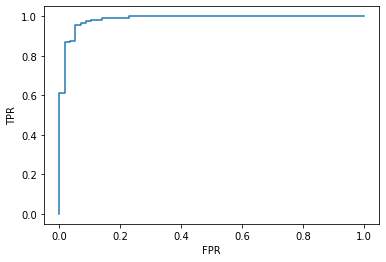

In [10]:
#ROC curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_prob = Lr.predict_proba(X_test)
y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)
plt.plot(FPR, TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [11]:
#auc area of curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_prob)

0.9855340104647583